## Imports

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)


pd.set_option('display.max_columns',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)

from sklearn import set_config
set_config(transform_output='pandas')

##  Define Custom Functions

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [118]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict



## Load the data

In [119]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
path = "/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/adult.csv"
# Get Data
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Dictionary

| Feature          | Description                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------|
| age              | Continuous                                                                                        |
| workclass        | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked |
| fnlwgt           | Continuous                                                                                        |
| education        | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool |
| education-num    | Continuous                                                                                        |
| marital-status   | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse |
| occupation       | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces |
| relationship     | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried                                |
| race             | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black                                       |
| sex              | Female, Male                                                                                     |
| capital-gain     | Continuous                                                                                        |
| capital-loss     | Continuous                                                                                        |
| hours-per-week  | Continuous                                                                                        |
| native-country  | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands |
| class            | >50K, <=50K                                                                                      |


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [122]:
df.duplicated().sum()

52

In [123]:
# Dropinh duplicates
df = df.drop_duplicates()

In [124]:
df.duplicated().sum()

0

In [125]:
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [126]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [127]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- workclass:
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64



- education:
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64



- marital-status:
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64



- occupation:
occupation
Prof-s

In [128]:
df = df.drop(df[df['workclass'] == '?'].index)
df = df.drop(df[df['occupation'] == '?'].index)
df = df.drop(df[df['native-country'] == '?'].index)

In [129]:
df[str_cols].nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
gender             2
native-country    41
income             2
dtype: int64

In [130]:
df.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.00,45175.00,45175.00,45175.00,45175.00,45175.00
mean,38.56,189738.80,10.12,1102.58,88.69,40.94
std,13.22,105652.44,2.55,7510.25,405.16,12.01
min,17.00,13492.00,1.00,0.00,0.00,1.00
25%,28.00,117392.50,9.00,0.00,0.00,40.00
50%,37.00,178312.00,10.00,0.00,0.00,40.00
75%,47.00,237903.00,13.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


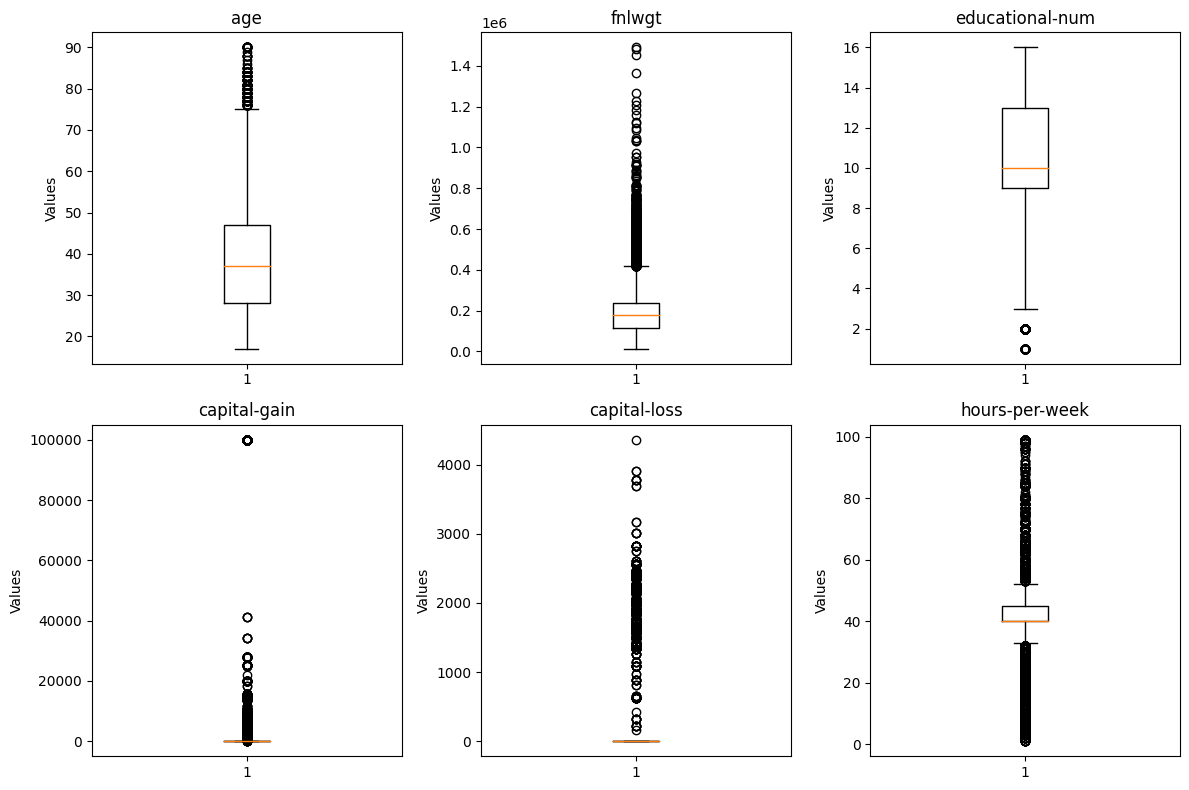

In [131]:
import matplotlib.pyplot as plt

# Define the columns containing numeric data
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [132]:
#pd.set_option('display.max_rows', None)
#df["capital-gain"]
max_value = df["capital-gain"].max()
max_value


99999

In [133]:
df = df[df["capital-gain"] != 99999]

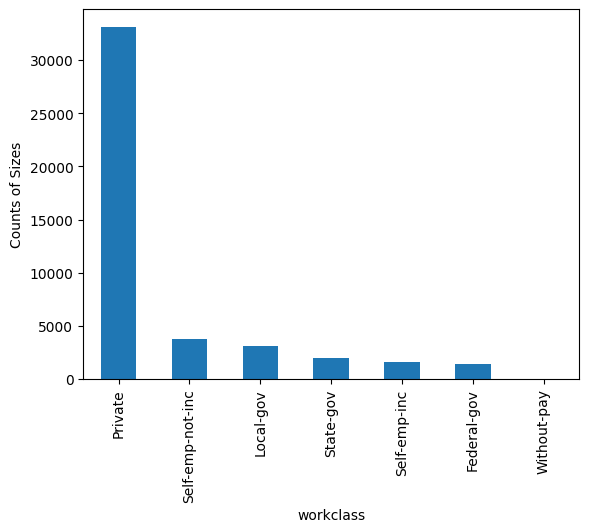

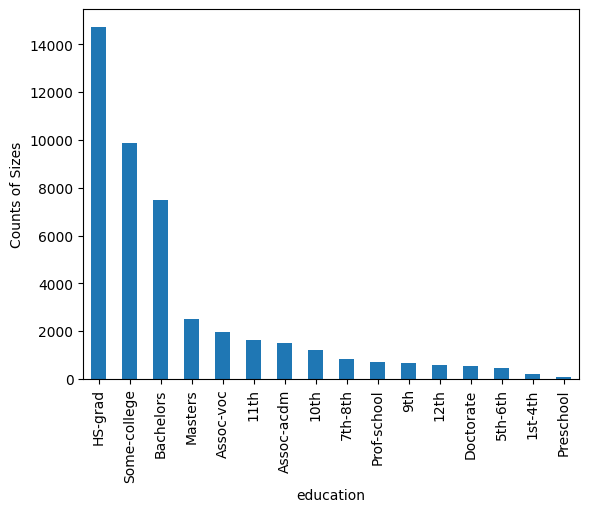

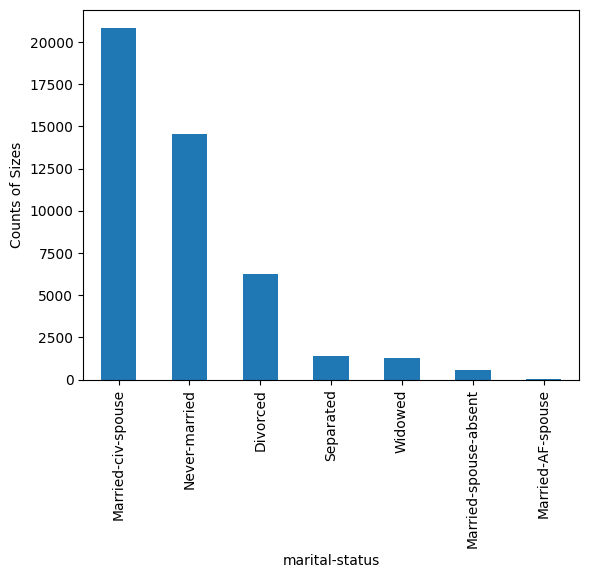

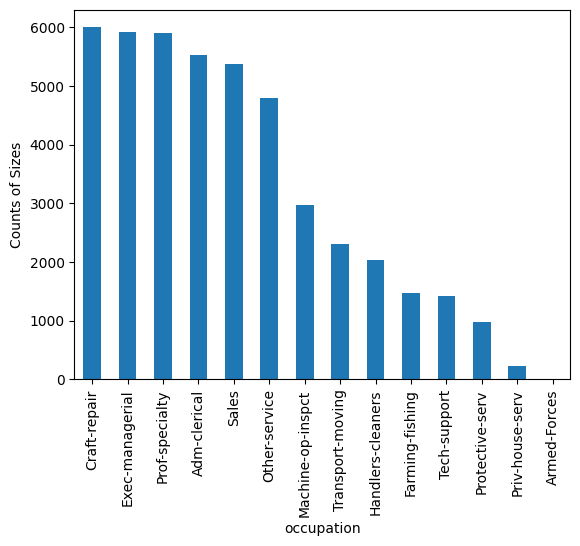

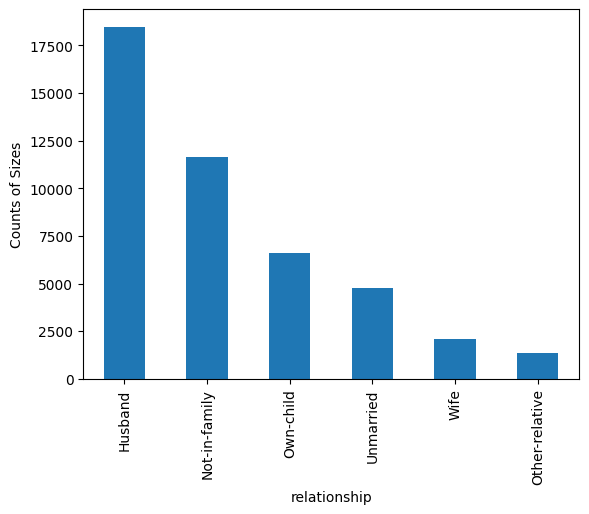

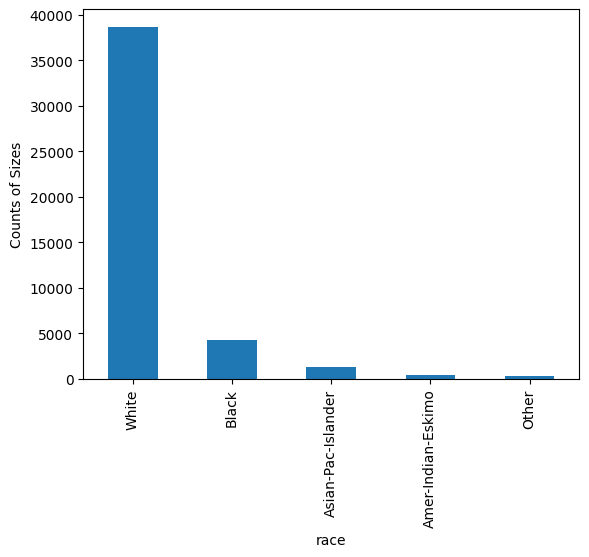

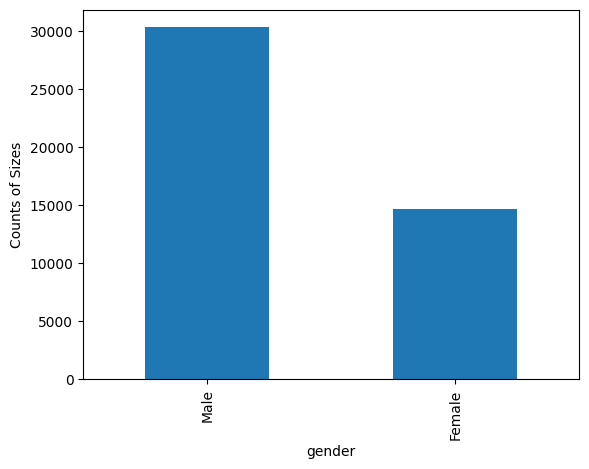

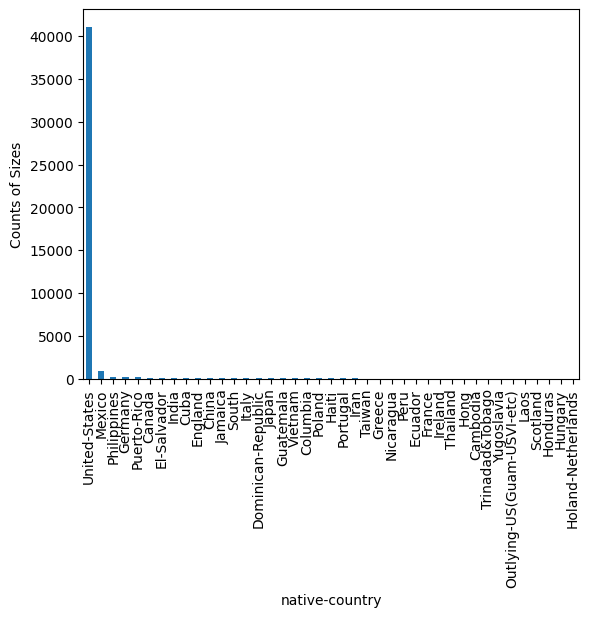

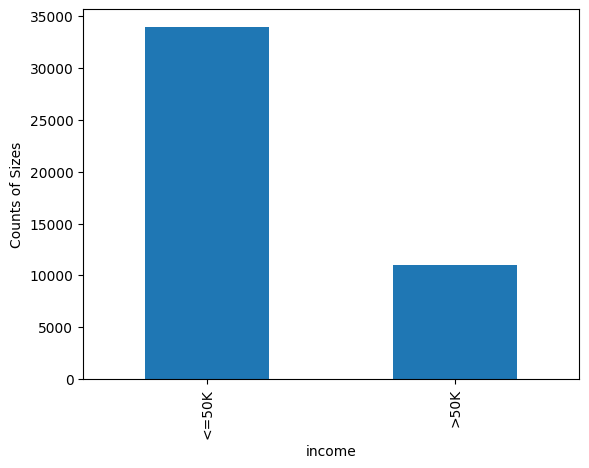

In [134]:
import matplotlib.pyplot as plt

# Iterate over each column and plot bar chart
for column in str_cols:
    # Get value counts
    val_counts = df[column].value_counts()

    # Plot bar chart
    ax = val_counts.plot(kind='bar')

    # Set labels
    ax.set_ylabel('Counts of Sizes')
    ax.set_xlabel(column)

    # Show plot
    plt.show()

In [135]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

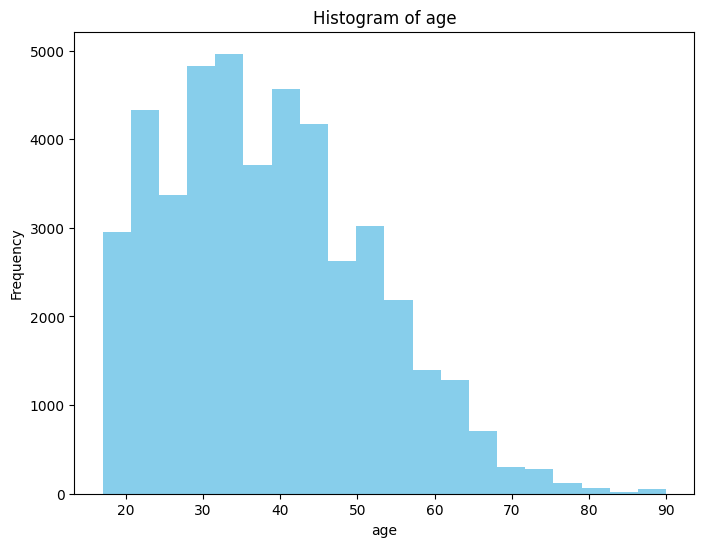

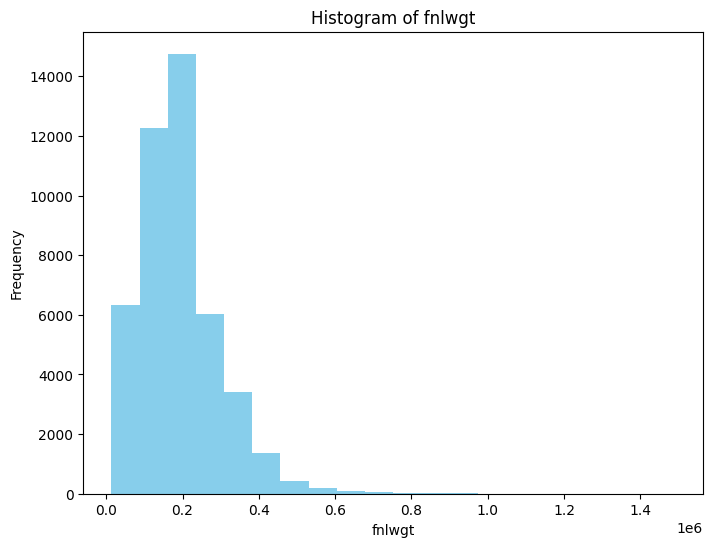

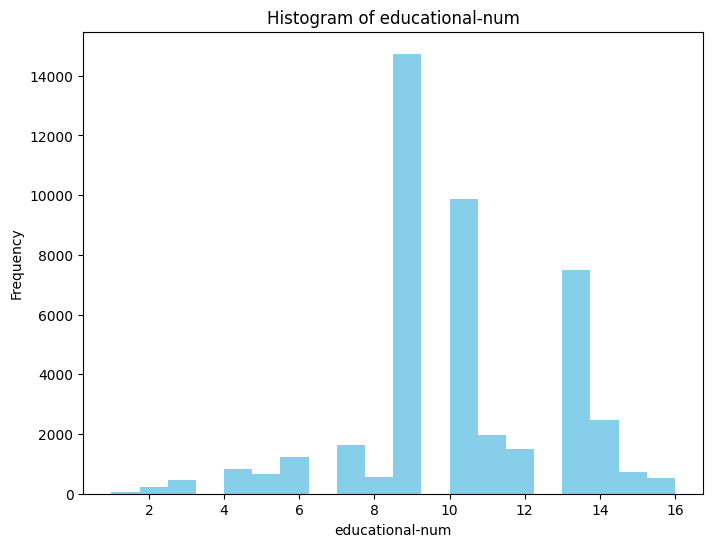

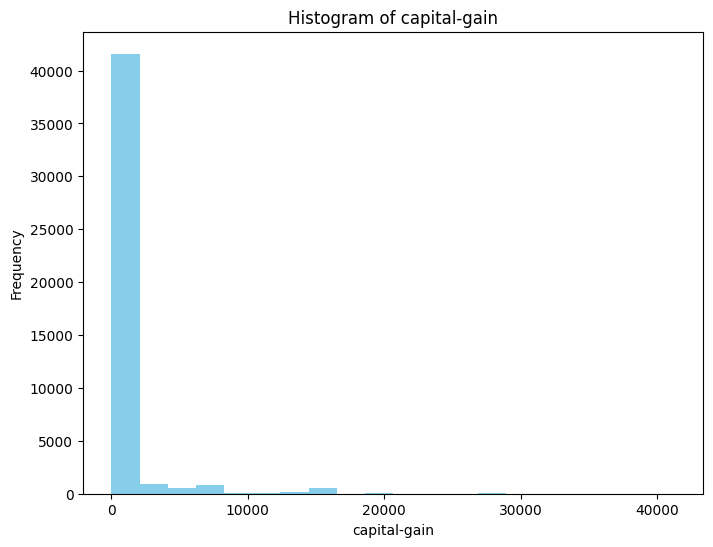

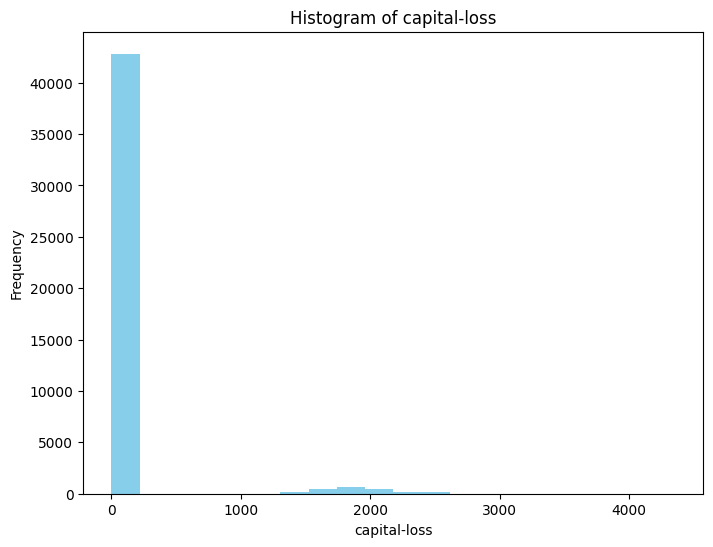

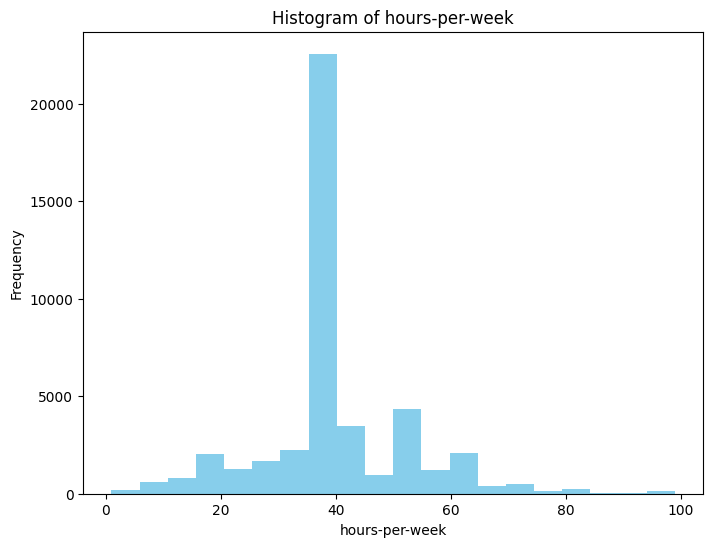

In [136]:
import matplotlib.pyplot as plt

# Iterate over each numeric column and plot bar chart
for column in num_cols:
    # Plot bar chart
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue')

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

    # Show plot
    plt.show()


In [137]:
# Define features and target
X = df.drop(columns = 'income')
y = df['income']


In [138]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_sk = accuracy_score(y_test, y_pred_test)
accuracy_sk

0.8100916614754827

In [139]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [140]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


In [141]:
# Create the preprocessing ColumnTransformer
preprocessor = ColumnTransformer([ohe_tuple, num_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [145]:
# Instantiate a default decision tree
dec_tree_class =DecisionTreeClassifier(random_state = 42)
# Make a pipeline to scale the data and fit a model
dec_tree_pipe = make_pipeline(preprocessor, dec_tree_class)
# Fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [148]:
# Define the predicted values
y_pred_train = dec_tree_pipe.predict(X_train)
y_pred_test = dec_tree_pipe.predict(X_test)
# Obtain the accuracy score
train_acc = accuracy_score(y_pred_train, y_train).round(3)
test_acc = accuracy_score(y_pred_test, y_test).round(3)
# Print the results
print(f'Training accuracy : {train_acc}.')
print(f'Testing accuracy  : {test_acc}.')



Training accuracy : 1.0.
Testing accuracy  : 0.81.


----------------------------------------------------------------------
 Classification Metrics: 
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      8526
        >50K       0.60      0.63      0.62      2711

    accuracy                           0.81     11237
   macro avg       0.74      0.75      0.74     11237
weighted avg       0.81      0.81      0.81     11237



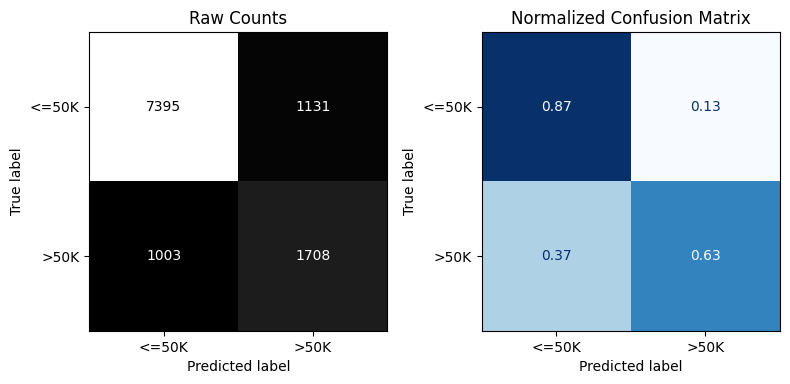

In [150]:
# Test the evalution_metrics helper function
classification_metrics(y_test, y_pred_test)



In [151]:
# Permutation importance takes a fit model and the test data.
r = permutation_importance(dec_tree_pipe, X_test, y_test,n_repeats =10, random_state = SEED)
r.keys()



dict_keys(['importances_mean', 'importances_std', 'importances'])

In [152]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

marital-status     0.055584
capital-gain       0.039503
educational-num    0.026920
age                0.018635
occupation         0.013482
capital-loss       0.011774
hours-per-week     0.008517
workclass          0.004814
gender             0.003061
education          0.002705
relationship       0.002340
race               0.001077
native-country     0.000071
fnlwgt            -0.000418
Name: permutation importance, dtype: float64

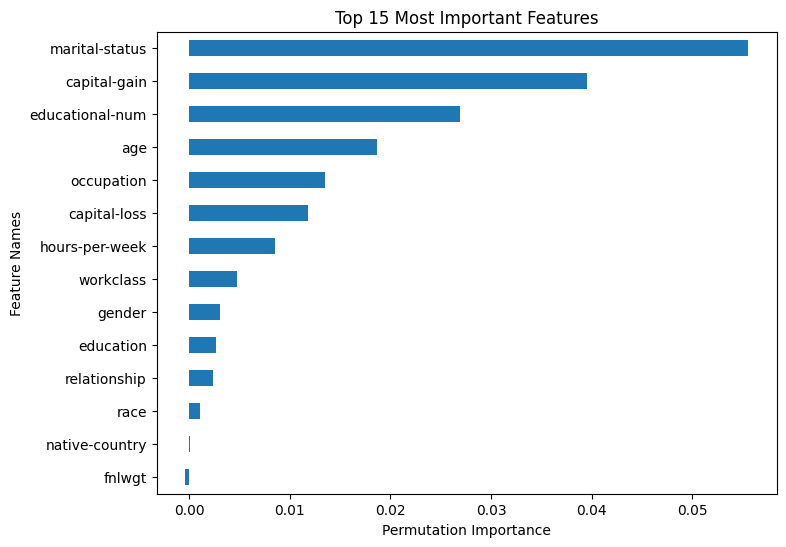

In [158]:
ax = plot_importance(permutation_importances,top_n=15)
ax.set(xlabel='Permutation Importance');

[Text(0.5, 0, 'Permutation Importance')]

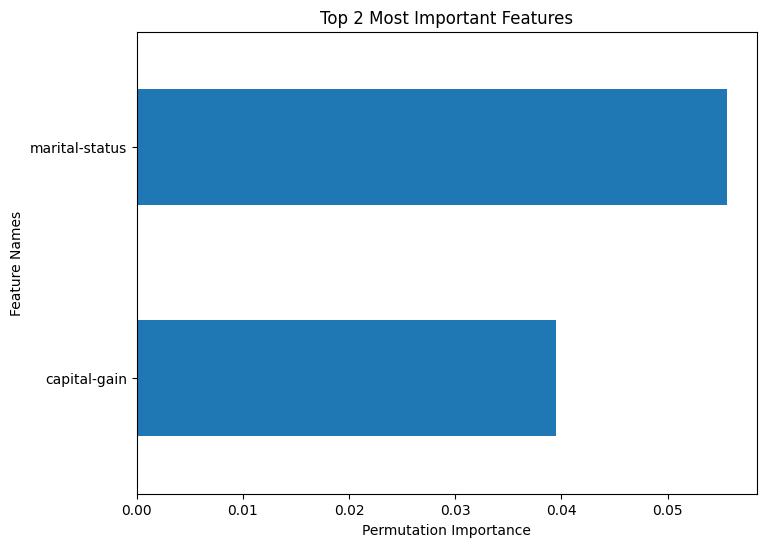

In [159]:
ax = plot_importance(permutation_importances.head(2), top_n=2)
ax.set(xlabel='Permutation Importance')